In [1]:
from fastai.vision.all import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from fastai.callback import SaveModelCallback, EarlyStoppingCallback

In [2]:
# Пути к файлам CSV
train_csv_path = "train_data.csv"
test_csv_path = "test_data.csv"

# Загрузка данных
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

# Путь к папке с изображениями
path = Path('')

In [3]:
print("Длина обучающего набора данных:", len(train_data))
print("Длина тестового набора данных:", len(test_data))


Длина обучающего набора данных: 6194
Длина тестового набора данных: 1554


In [4]:
# Создание DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('image_path', pref=path),
                   get_y=ColReader('label'),
                   splitter=RandomSplitter())

In [5]:
# Создание DataLoaders
dls = dblock.dataloaders(train_data, bs=64)

In [6]:
# Создание модели
learn = cnn_learner(dls, resnet34, metrics=accuracy)

C:\Users\14488\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [7]:
# 3. Обучение модели
# learn.fine_tune(epochs=5)
# Очень долго считает. Сохранил эту модель в data\\fine_tune

epoch,train_loss,valid_loss,accuracy,time
0,2.296398,1.483505,0.544427,13:42


epoch,train_loss,valid_loss,accuracy,time
0,1.371058,1.220466,0.604200,16:55
1,0.972316,1.268260,0.633280,19:28
2,0.507000,1.252336,0.646204,18:45
3,0.211973,1.287090,0.651050,18:11
4,0.101848,1.288203,0.648627,21:13


In [17]:
# Определение пути для сохранения модели
model_save_path = "fit_one_cycle"

# Определение коллбэка EarlyStopping
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)

# Определение коллбэка SaveModel
save_model_cb = SaveModelCallback(monitor='valid_loss', fname='best_model')

# Обучение модели с использованием коллбэков EarlyStopping и SaveModel
learn.fit_one_cycle(epochs=20, cbs=[early_stopping_cb, save_model_cb])

# Сохранение модели
learn.export(model_save_path)

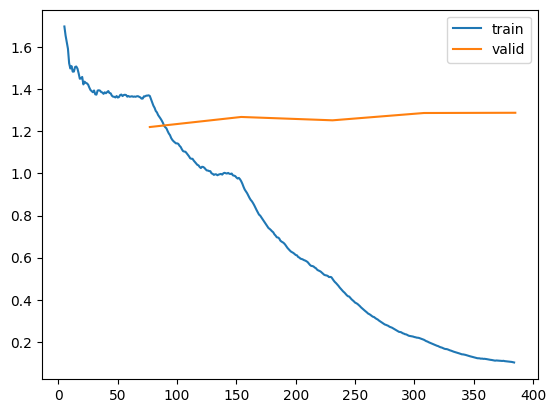

In [8]:
# График потерь (Loss Plot): Это график, показывающий изменение потерь (loss) на обучающем 
# и валидационном наборах данных в течение эпох обучения. 
# Можно использовать метод Recorder.plot_loss() для визуализации этого графика.

learn.recorder.plot_loss()

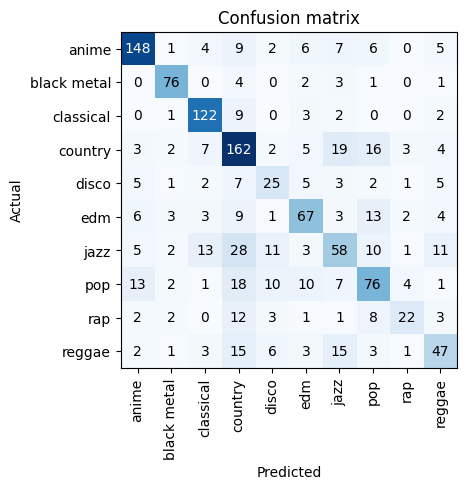

In [9]:
# Матрица ошибок (Confusion Matrix): Матрица ошибок позволяет визуализировать,
# какие классы модель чаще всего путает между собой. 
# Для построения матрицы ошибок можно использовать класс ClassificationInterpretation.

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [10]:
# График точности (Accuracy Plot): Этот график показывает изменение точности модели 
# на обучающем и валидационном наборах данных в течение эпох обучения. 
# Можно использовать метод Recorder.plot_metrics() для визуализации графика точности.

learn.recorder.plot_metrics()


AttributeError: 'Sequential' object has no attribute 'plot_metrics'

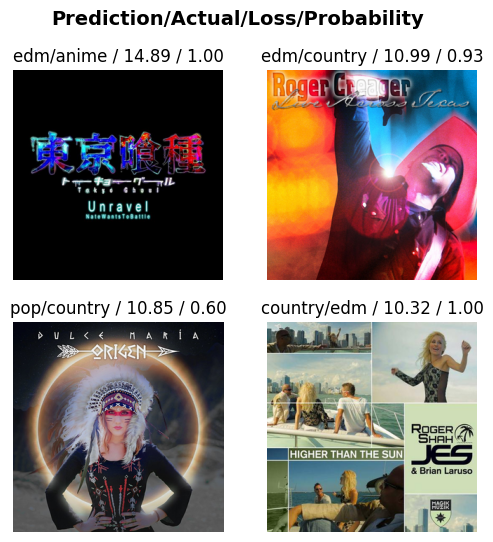

In [11]:
# Визуализация предсказаний (Prediction Visualization): 
# Можно визуализировать предсказания модели на тестовом наборе данных, 
# например, с помощью графиков с предсказанными и фактическими метками.

interp.plot_top_losses(k=4)  # Показать примеры наиболее ошибочных предсказаний


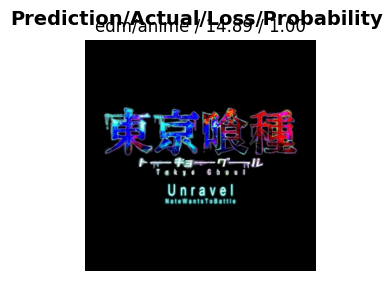

In [12]:
# Визуализация результатов на изображениях:
# Можно также визуализировать результаты модели на конкретных изображениях, 
# например, показать исходное изображение с предсказанной меткой.

interp.plot_top_losses(k=1, largest=True)  # Показать пример наиболее ошибочного предсказания